In [115]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [116]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

7
8
9
0
1
2


<Figure size 432x288 with 0 Axes>

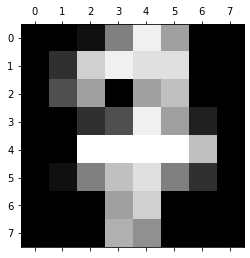

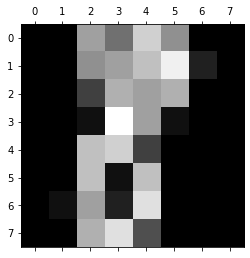

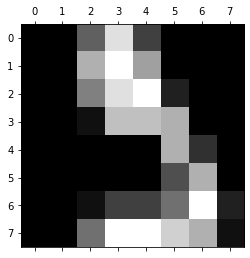

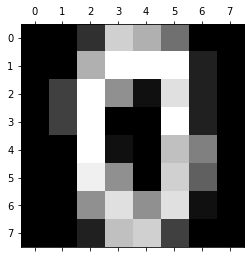

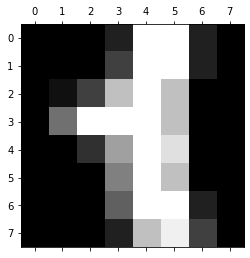

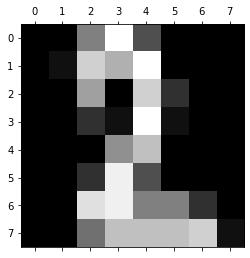

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray() 
for i in range(17,23):
    plt.matshow(digits.images[i])
    print(digits.target[i])

In [117]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [118]:
X = df.values
Y = digits.target

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [120]:
x_test.shape

(360, 64)

In [122]:
from sklearn.ensemble import RandomForestClassifier
max_acc = 0;
for i in range(1,51):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(x_train,y_train)
    accuracy = 100*(model.score(x_test,y_test));
    if (max_acc<accuracy):
        for_n = i
        max_acc = accuracy
    #print("n_estimator: {}, model_accuracy: {}".format(i, accuracy))
print("max_accuracy for n_estimator: {} and max_accuracy: {}".format(for_n, max_acc))

max_accuracy for n_estimator: 43 and max_accuracy: 97.5


In [129]:
model = RandomForestClassifier(n_estimators=43)
model.fit(x_train,y_train)
model.score(x_test,y_test)*100

97.5

In [133]:
y_pred = model.predict(x_test)

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]], dtype=int64)

<AxesSubplot:>

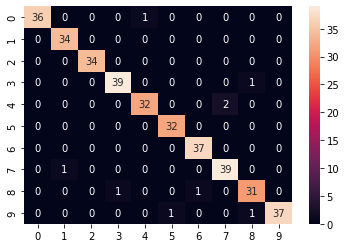

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

plt.figure(figsize=(6,4))
plt.xlabel('True value')
plt.ylabel('Predicted value')
sb.heatmap(cm, annot=True)
